<div style="border: 2px solid black;  padding: 16px;"> <h1 style= "color:black; text-align:center;"><strong>SYSTEM THREAT FORECASTER PROJECT</strong></h1></div>

<div style="border: 2px solid black; padding: 10px;"> <h4 style= "color:black; text-align:center;">Downloading the train_threat_data for the Competition</h4></div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


<div style="border: 2px solid black; padding: 10px;"> <h4 style= "color:black; text-align:center;">Importing Needed Libraries</h4></div>

In [2]:
# Data Handling Libraries
import pandas as pd
import numpy as np

# Data Preprocessing Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

# Feature Engineering Libraries
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge

# Data Splitting and Transformation Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Exploratory Data Analysis (EDA) Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Classification Models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Machine Learning Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    f1_score,
    mean_squared_error
)

# Decision Boundary Display
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import TruncatedSVD

<div style="border: 2px solid black; padding: 10px;"> <h4 style= "color:black; text-align:center;">Loading of the Training train_threat_data</h4></div>

In [3]:
# Read Traning train_threat_data
train_threat_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
print(train_threat_data.shape)

(100000, 76)


<div style="border: 2px solid black; padding: 10px;"> <h4 style= "color:black; text-align:center;">EDA (Exploratory Data Analysis)</h4></div>


<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Information about the Data</h5></div>

In [4]:
train_threat_data

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,a378b2196a7a1d8ee0d4f989ee46730e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1582.0,0,7.0,0,68585.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-21 00:59:00,2018-09-20,0
99996,7f4433ca05d24b9bbdd3932f8b05e61f,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1156.0,0,7.0,0,11280.0,2.0,...,0,0.0,0,0,0.0,0.0,3.0,2018-08-10 07:23:00,2018-07-10,0
99997,d6852dfff534e03d5ddfd3c7875ab072,win8defender,1.1.15200.1,4.18.1807.18075,1.275.209.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,1.0,1.0,2018-08-26 23:51:00,2018-03-13,1
99998,70a8dc682128c9ff78a3de5aea9dac74,win8defender,1.1.14901.4,4.16.17656.18052,1.269.641.0,0,7.0,0,53447.0,1.0,...,1,0.0,1,1,1.0,0.0,1.0,2018-06-04 17:13:00,2018-05-08,0


In [5]:
train_threat_data.dtypes

MachineID            object
ProductName          object
EngineVersion        object
AppVersion           object
SignatureVersion     object
                     ...   
IsGamer             float64
RegionIdentifier    float64
DateAS               object
DateOS               object
target                int64
Length: 76, dtype: object

In [6]:
print("\nSummary Statistics:")
train_threat_data.describe()


Summary Statistics:


,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [7]:
print("\ntrain_threat_data Info:")
train_threat_data.info()


train_threat_data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  Ha

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Check for missing values</h5></div>

In [8]:
print("\nMissing Values:")
print(train_threat_data.isnull().sum())


Missing Values:
MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64


<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Univariate Analysis</h5></div>

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

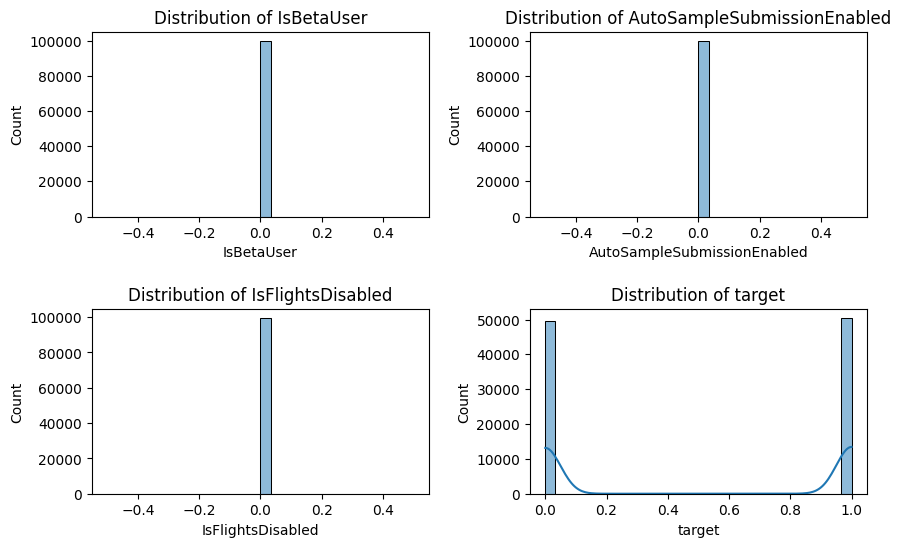

In [9]:
# Define the columns to plot
columns_to_plot = ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'target']

# Set up the figure with 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes for easy iteration
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(train_threat_data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.show()


<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Count Plot for Categorical Features</h5></div>

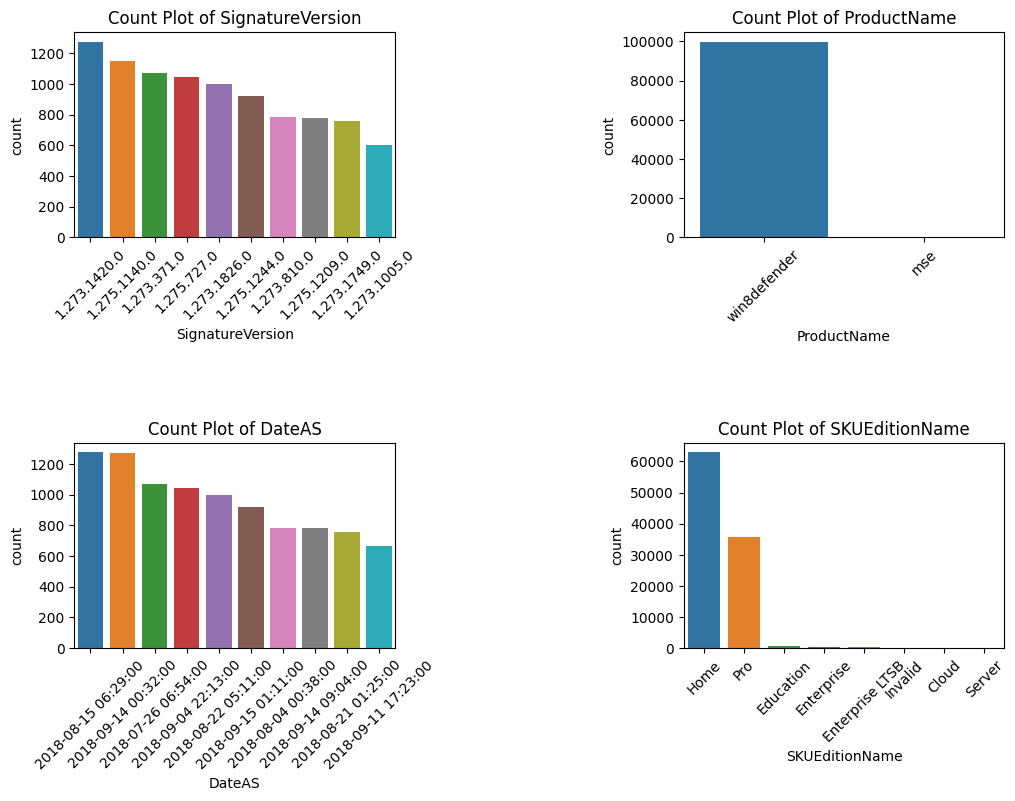

In [10]:
# Define the categorical columns to plot
cat_columns_to_plot = ['SignatureVersion', 'ProductName', 'DateAS', 'SKUEditionName']

# Set up the figure with 2 columns for categorical data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=1.0, wspace=0.9)  # Increased spacing to prevent overlap

# Flatten axes for easy iteration
axes = axes.flatten()

for i, column in enumerate(cat_columns_to_plot):
    top_categories = train_threat_data[column].value_counts().index[:10]  # Limit to top 10 categories
    sns.countplot(x=column, data=train_threat_data, order=top_categories, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].tick_params(axis='x', rotation=45)

plt.show()

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Whisker Plot for all features</h5></div>

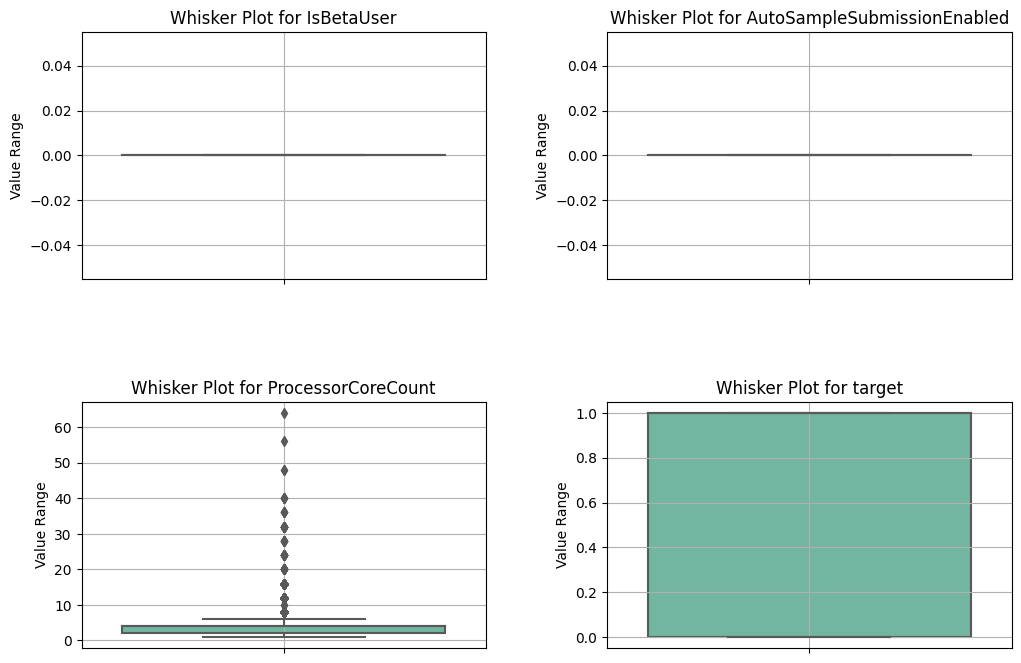

In [11]:
numerical_features = train_threat_data.select_dtypes(include=['number']).columns.tolist()
num_columns_to_plot = ['IsBetaUser', 'AutoSampleSubmissionEnabled','ProcessorCoreCount','target']

# Create a single figure with subplots for all features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

axes = axes.flatten()

for i, feature in enumerate(num_columns_to_plot):
    sns.boxplot(y=train_threat_data[feature], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Whisker Plot for {feature}')
    axes[i].set_ylabel('Value Range')
    axes[i].grid(True)

plt.show()

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Finding Low Variance Features, Skweness of Features, Outliers in Dataset and Highly Correlated Features</h5></div>

In [12]:
df = train_threat_data.copy()

# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute variance for numerical columns
variance = df[numeric_cols].var()
low_variance_cols = variance[variance < 0.01].index  # Threshold: 0.01

# Compute skewness
skewness = df[numeric_cols].skew()
highly_skewed_cols = skewness[abs(skewness) > 2].index  # Threshold: ±2

# Outlier detection using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
outlier_cols = outliers[outliers > 0].index  # Columns with outliers

# Correlation matrix
correlation_matrix = df[numeric_cols].corr().abs()
high_correlation_pairs = []
threshold = 0.85  # High correlation threshold

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            high_correlation_pairs.append((col1, col2, correlation_matrix.iloc[i, j]))
report = ""

# Low Variance Features
report += "\n Low Variance Features (Consider Removing):\n"
report += ", ".join(low_variance_cols) if len(low_variance_cols) > 0 else "None"

# Highly Skewed Features
report += "\n\n Highly Skewed Features (Consider Transformation):\n"
report += ", ".join(highly_skewed_cols) if len(highly_skewed_cols) > 0 else "None"

# Outliers
report += "\n\n Features with Outliers (Consider Scaling or Removing Extreme Values):\n"
report += ", ".join(outlier_cols) if len(outlier_cols) > 0 else "None"

# Correlation Report
report += "\n\n Highly Correlated Feature Pairs (Consider Removing One of Each):\n"
if len(high_correlation_pairs) > 0:
    for col1, col2, corr_value in high_correlation_pairs:
        report += f"- {col1} & {col2} (Correlation: {corr_value:.2f})\n"
else:
    report += "None"

# Print Report
print(report)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)



 Low Variance Features (Consider Removing):
IsBetaUser, HasTpm, AutoSampleSubmissionEnabled, SMode, IsPortableOS, IsFlightsDisabled, IsVirtualDevice

 Highly Skewed Features (Consider Transformation):
RealTimeProtectionState, IsPassiveModeEnabled, AntivirusConfigID, NumAntivirusProductsEnabled, HasTpm, OSBuildNumber, IsSystemProtected, SMode, IEVersionID, FirewallEnabled, EnableLUA, ProcessorCoreCount, ProcessorManufacturerID, HasOpticalDiskDrive, TotalPhysicalRAMMB, PrimaryDisplayDiagonalInches, PrimaryDisplayResolutionHorizontal, PrimaryDisplayResolutionVertical, OSBuildNumberOnly, OSBuildRevisionOnly, IsPortableOS, IsVirtualDevice, IsTouchEnabled, IsPenCapable, IsAlwaysOnAlwaysConnectedCapable

 Features with Outliers (Consider Scaling or Removing Extreme Values):
RealTimeProtectionState, IsPassiveModeEnabled, AntivirusConfigID, NumAntivirusProductsInstalled, NumAntivirusProductsEnabled, HasTpm, OSBuildNumber, IsSystemProtected, SMode, IEVersionID, FirewallEnabled, EnableLUA, OEMNa

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Exploratory Dataset Analysis Reportr</h5></div>

## Next Steps:
1. Remove low-variance features if deemed unnecessary.
2. Normalize highly skewed features to improve model performance.
3. Address outliers using robust scaling techniques.
4. Reduce multicollinearity by removing or transforming correlated features.
5. Validate preprocessing choices through iterative modeling experiments.

<div style="border: 2px solid black; padding: 10px;"> <h4 style= "color:black; text-align:center;">Preprocessing and Pipelining</h4></div>

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Remove Low Variance Features</h5></div>
During experimentation, it was found that removing all low-variance features negatively impacted the trained model's accuracy. As a result, only these specific features were removed while retaining other low-variance features to ensure better model performance.

In [13]:
# Remove Low Variance Features
low_variance_features = ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']
train_threat_data.drop(columns=low_variance_features, inplace=True, errors='ignore')

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Handle Highly Skewed Features</h5></div>

**Loss of interpretability:** Log transformation changed the feature distribution in a way that made feature importance harder to analyze.

**Model accuracy dropped:** Some machine learning models (especially tree-based models) inherently handle skewed data well. Applying transformations led to a decrease in predictive performance.

**Feature value compression:** Log transformation reduced variability in certain features, making it harder for the model to differentiate between important data points.

In [14]:
'''# Handle Highly Skewed Features
skewed_features = [
    "RealTimeProtectionState", "IsPassiveModeEnabled", "AntivirusConfigID", 
    "NumAntivirusProductsEnabled", "TotalPhysicalRAMMB", "PrimaryDisplayDiagonalInches", 
    "PrimaryDisplayResolutionHorizontal", "PrimaryDisplayResolutionVertical"
]

# Apply log transformation where applicable
for col in skewed_features:
    if col in train_threat_data.columns and train_threat_data[col].min() > 0:  # Ensure no negative values
        train_threat_data[col] = np.log1p(train_threat_data[col])  # log1p handles zero values better'''

'# Handle Highly Skewed Features\nskewed_features = [\n    "RealTimeProtectionState", "IsPassiveModeEnabled", "AntivirusConfigID", \n    "NumAntivirusProductsEnabled", "TotalPhysicalRAMMB", "PrimaryDisplayDiagonalInches", \n    "PrimaryDisplayResolutionHorizontal", "PrimaryDisplayResolutionVertical"\n]\n\n# Apply log transformation where applicable\nfor col in skewed_features:\n    if col in train_threat_data.columns and train_threat_data[col].min() > 0:  # Ensure no negative values\n        train_threat_data[col] = np.log1p(train_threat_data[col])  # log1p handles zero values better'

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Handle Outliers</h5></div>
**Loss of important information:** Some outliers contained critical distinguishing information that contributed to model accuracy.

**Overcorrection of variance:** Clipping extreme values led to a less diverse dataset, reducing the model's ability to generalize.

**Accuracy reduction:** After removing or scaling outliers, validation performance declined, suggesting that the extreme values were actually useful for prediction.

In [15]:
'''# Handle Outliers
outlier_features = [
    "RealTimeProtectionState", "OSBuildNumber", "ProcessorCoreCount", 
    "PrimaryDiskCapacityMB", "SystemVolumeCapacityMB", "TotalPhysicalRAMMB"
]

# Use robust scaling to minimize the effect of outliers
scaler = RobustScaler()
train_threat_data[outlier_features] = scaler.fit_transform(train_threat_data[outlier_features])

# Optionally, clip extreme outliers at 1st and 99th percentile
for col in outlier_features:
    lower_bound, upper_bound = np.percentile(train_threat_data[col], [1, 99])
    train_threat_data[col] = np.clip(train_threat_data[col], lower_bound, upper_bound)'''

'# Handle Outliers\noutlier_features = [\n    "RealTimeProtectionState", "OSBuildNumber", "ProcessorCoreCount", \n    "PrimaryDiskCapacityMB", "SystemVolumeCapacityMB", "TotalPhysicalRAMMB"\n]\n\n# Use robust scaling to minimize the effect of outliers\nscaler = RobustScaler()\ntrain_threat_data[outlier_features] = scaler.fit_transform(train_threat_data[outlier_features])\n\n# Optionally, clip extreme outliers at 1st and 99th percentile\nfor col in outlier_features:\n    lower_bound, upper_bound = np.percentile(train_threat_data[col], [1, 99])\n    train_threat_data[col] = np.clip(train_threat_data[col], lower_bound, upper_bound)'

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Remove Highly Correlated Features</h5></div>

**Feature redundancy was beneficial:** Despite high correlation, both features in some pairs provided meaningful insights when used together.

**Feature removal lowered accuracy:** Dropping one feature from each pair led to a decrease in model accuracy, indicating that the model relied on subtle differences in the correlated features.

Certain features acted as proxies for other patterns in the data, and removing them disrupted the model's predictive power.

In [16]:
'''# Remove Highly Correlated Features
correlated_features = {
    "IsPassiveModeEnabled": "RealTimeProtectionState",
    "PrimaryDisplayResolutionVertical": "PrimaryDisplayResolutionHorizontal",
    "OSBuildNumberOnly": "OSBuildNumber",
    "OSUILocaleID": "OSInstallLanguageID"
}

for drop_col, keep_col in correlated_features.items():
    if drop_col in train_threat_data.columns:
        train_threat_data.drop(columns=[drop_col], inplace=True)'''

'# Remove Highly Correlated Features\ncorrelated_features = {\n    "IsPassiveModeEnabled": "RealTimeProtectionState",\n    "PrimaryDisplayResolutionVertical": "PrimaryDisplayResolutionHorizontal",\n    "OSBuildNumberOnly": "OSBuildNumber",\n    "OSUILocaleID": "OSInstallLanguageID"\n}\n\nfor drop_col, keep_col in correlated_features.items():\n    if drop_col in train_threat_data.columns:\n        train_threat_data.drop(columns=[drop_col], inplace=True)'

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Dropping Duplicate Rows</h5></div>

In [17]:
#Dropping Duplicate Rows
train_threat_data.drop_duplicates(inplace=True)
print(train_threat_data.shape)

(99835, 73)


<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Segregating features and target variable</h5></div>

In [18]:
X_data = train_threat_data.drop('target', axis=1)
y_data = train_threat_data['target']

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Identifying categorical and non-categorical columns in the feature dataset</h5></div>

In [19]:
non_categorical_columns = X_data.select_dtypes(include=['number']).columns
categorical_columns = X_data.select_dtypes(exclude=['number']).columns

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Spliting the feature data into training and testing sets</h5></div>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Defining separate preprocessing steps for numeric and categorical features</h5></div>

In [21]:
numerical_transformation = Pipeline(steps=[
    ('simple imputer', SimpleImputer(strategy='mean')),
    ('standard scaler', StandardScaler())
])
categorical_transformation = Pipeline(steps=[
    ('simple imputer', SimpleImputer(strategy='constant', fill_value = 'missing')),
    ('onehot encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformation, non_categorical_columns),
        ('categorical', categorical_transformation, categorical_columns)
    ]
)

<div style="border: 2px solid black; padding: 10px;"> <h4 style= "color:black; text-align:center;">Model Traning and scoring</h4></div>

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Hyper-paramters</h5></div>

In [22]:
parameter_range = [2,3,4]
parameter_range_fl = [0.1,0.2,0.3]
n_estimators = [100,1000,1500]
learning_rates = [1,2]

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Decision Tree Classifier</h5></div>

In [23]:
pipeline_decision_tree_classifier = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k='all')),
    ('decision_tree_classifier', DecisionTreeClassifier(random_state = 42, max_depth= 20, min_samples_leaf= 1,min_samples_split= 2 ))
])

decision_tree_parameter_grid = [{'decision_tree_classifier__criterion': ['log_loss', 'entropy'],
                   'decision_tree_classifier__min_samples_leaf': parameter_range,
                   'decision_tree_classifier__max_depth': [6,7,8,9,10],
                   'decision_tree_classifier__min_samples_split': parameter_range[1:]}]

decision_tree_grid_search = GridSearchCV(estimator=pipeline_decision_tree_classifier,
        param_grid=decision_tree_parameter_grid,
        scoring='accuracy',
        cv=3, n_jobs=4)

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Logistic Regression Classifier</h5></div>

In [24]:
pipeline_logistic_regression_classifier = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k='all')),
    ('logistic_regression_classifier', LogisticRegression(max_iter=1500))   
])

logistic_regression_parameter_grid = [{'logistic_regression_classifier__penalty': ['l1', 'l2'],
                   'logistic_regression_classifier__C': parameter_range_fl,
                   'logistic_regression_classifier__solver': ['liblinear', 'saga']}]

logistic_regression_grid_search = GridSearchCV(estimator=pipeline_logistic_regression_classifier,
        param_grid=logistic_regression_parameter_grid,
        scoring='accuracy',
        cv=3, n_jobs=4)

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Ada Boost Classifier</h5></div>

In [25]:
pipeline_ada_boost_classifier = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k='all')),
    ('ada_boost_classifier', AdaBoostClassifier(random_state=42))
])

ada_boost_parameter_grid = [{'ada_boost_classifier__n_estimators': n_estimators,
                   'ada_boost_classifier__learning_rate': learning_rates,
                   'ada_boost_classifier__algorithm': ['SAMME']}]

ada_boost_grid_search = GridSearchCV(estimator=pipeline_ada_boost_classifier,
        param_grid=ada_boost_parameter_grid,
        scoring='accuracy',
        cv=3, n_jobs=4)

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">EXtreme Gradient Boosting</h5></div>

In [26]:
pipeline_eXtreme_gradient_Boosting = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb_classifier', XGBClassifier())
])

<div style="border: 2px solid black; padding: 10px;"> <h5 style= "color:black; text-align:center;">Comparing diffrent Models</h5></div>

In [27]:
grid_search_list = [decision_tree_grid_search , logistic_regression_grid_search , ada_boost_grid_search, pipeline_eXtreme_gradient_Boosting]
for pipeline in grid_search_list:
    pipeline.fit(X_train,y_train)

In [28]:
grid_search_dictionary = {0:'Decision Trees Classifier' , 1: 'Logistic Regression Classifier', 2: 'AdaBoost Classifier', 3: 'pipeline_eXtreme_gradient_Boosting'}
#scoring of the scores & best parameters for the best model from all models
for i, model in enumerate(grid_search_list):
    print('{} Test Accuracy: {}'.format(grid_search_dictionary[i],model.score(X_test,y_test)))
    if (grid_search_dictionary[i]!='pipeline_eXtreme_gradient_Boosting'):
        print('{} Best Params: {}'.format(grid_search_dictionary[i],model.best_params_))

Decision Trees Classifier Test Accuracy: 0.6012420493814794
Decision Trees Classifier Best Params: {'decision_tree_classifier__criterion': 'log_loss', 'decision_tree_classifier__max_depth': 6, 'decision_tree_classifier__min_samples_leaf': 3, 'decision_tree_classifier__min_samples_split': 3}
Logistic Regression Classifier Test Accuracy: 0.6132117994691241
Logistic Regression Classifier Best Params: {'logistic_regression_classifier__C': 0.2, 'logistic_regression_classifier__penalty': 'l1', 'logistic_regression_classifier__solver': 'saga'}
AdaBoost Classifier Test Accuracy: 0.6146141132869234
AdaBoost Classifier Best Params: {'ada_boost_classifier__algorithm': 'SAMME', 'ada_boost_classifier__learning_rate': 1, 'ada_boost_classifier__n_estimators': 1000}
pipeline_eXtreme_gradient_Boosting Test Accuracy: 0.6222767566484699


# Model Comparison and Analysis

## Model Performance Summary
| Model | Test Accuracy |
|--------|--------------|
| **XGBoost** | **0.6223** |
| **AdaBoost** | **0.6146** |
| **Logistic Regression** | **0.6132** |
| **Decision Trees** | **0.6012** |

## Model Insights

### 1. XGBoost Classifier
**Test Accuracy: 0.6223**  
XGBoost outperformed all other models, likely due to its ability to handle complex relationships and interactions within the data. XGBoost's boosting mechanism helps improve performance by iteratively reducing errors from previous iterations.

### 2. AdaBoost Classifier
**Test Accuracy: 0.6146**  
AdaBoost was the second-best performing model. With **1,000 estimators** and a **SAMME algorithm**, it showed competitive performance. The iterative learning process allows it to focus on misclassified samples, improving accuracy.

<div style="border: 2px solid black; padding: 10px;"> <h4 style= "color:black; text-align:center;">Appying the chosen model on Traning Data</h4></div>

In [29]:
#Selecting the model with best performance
model = grid_search_list[3]

In [30]:
#Read Testing Data
test_threat_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')
test_threat_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,...,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,...,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,...,12126.0,0,0.0,0,0,0.0,0.0,7.0,2018-05-06 01:31:00,2018-06-12


In [31]:
print(test_threat_data)

                             MachineID   ProductName EngineVersion  \
0     c2c61173092ad20db5585ca8c10de6e0  win8defender   1.1.15100.1   
1     2e6bb5362ba1ce897feeb1de5edea686  win8defender   1.1.15100.1   
2     692649baed1c50bb8d051ae7f06e3625  win8defender   1.1.15200.1   
3     2ff95e7d97e9f80ec81c97622dd93ed6  win8defender   1.1.15300.6   
4     256766b4c5011e146f05b323863e08a4  win8defender   1.1.14800.3   
...                                ...           ...           ...   
9995  42d3ddb25eeb149517e2b6871b061df4  win8defender   1.1.15200.1   
9996  3d474c494d797cafc2ab1665711f0f91  win8defender   1.1.15100.1   
9997  9aee2fc73af8240a688ceb83d41c0418  win8defender   1.1.15200.1   
9998  a2f8c1f88b78271c38767fe43850b359  win8defender   1.1.15200.1   
9999  c1c85a860e30097b03c815aa908cd17d  win8defender   1.1.15000.2   

            AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0      4.18.1807.18075     1.273.1276.0           0                      7.0   

In [32]:
# Check if 'ID' column exists and rename or create it if necessary
if 'ID' in test_threat_data.columns:
    identifier_column = 'ID'
elif 'id' in test_threat_data.columns:
    identifier_column = 'id'
else:
    test_threat_data['ID'] = range(0, len(test_threat_data))
    identifier_column = 'ID'

# Ensure test_threat_dataset has the same columns as X_train, except for the target variable
missing_cols = set(X_train.columns) - set(test_threat_data.columns)
if missing_cols:
    raise ValueError(f"Missing columns in test train_threat_data: {missing_cols}")

In [33]:
# Predict on the test data
y_predicted = model.predict(test_threat_data)

<div style="border: 2px solid black; padding: 10px;"> <h4 style= "color:black; text-align:center;">Creating the Submission.csv and Submiting it</h4></div>

In [34]:
# Create a submission DataFrame
submission_data = pd.DataFrame({
    'id': test_threat_data[identifier_column],  # Use the correct identifier column
    'target': y_predicted
})
print(submission_data)

# Save the submission file
submission_data.to_csv('/kaggle/working/submission.csv', index=False)

        id  target
0        0       1
1        1       1
2        2       1
3        3       0
4        4       0
...    ...     ...
9995  9995       0
9996  9996       1
9997  9997       0
9998  9998       1
9999  9999       0

[10000 rows x 2 columns]
